In [1]:
%pip install snowflake-connector-python==2.3.5

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, './scripts')
from snowflakeDbConnector import SnowflakeDbConnector

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/snowflake/connector/options.py:78: UserWarning: You have an incompatible version of 'pyarrow' installed (6.0.1), please install a version that adheres to: 'pyarrow<0.18.0,>=0.17.0; extra == "pandas"'
  warn_incompatible_dep('pyarrow', _installed_pyarrow_version.version, _expected_pyarrow_version)


In [3]:
client = 'colgate'
snowflake_db_connector = SnowflakeDbConnector()
database_query = f'''
        use database brands_{client};
        '''
snowflake_db_connector.getResultForQuery(database_query)

,status
0,Statement executed successfully.


In [14]:
# dataframe_query = f'''
#         select * from ams.keywords_report limit 1000;
#         '''
dataframe_query = f'''
DESCRIBE TABLE ams.campaigns_headline_report;
        '''
campaigns_headline_report_manual = snowflake_db_connector.getResultForQuery(dataframe_query)
campaigns_headline_report_manual

,name,type,kind,null?,default,primary key,unique key,check,expression,comment,policy name
0,CLIENT_ID,"NUMBER(38,0)",COLUMN,Y,None,N,N,None,None,None,None
1,PROFILE_ID,VARCHAR(16777216),COLUMN,Y,None,N,N,None,None,None,None
2,CAMPAIGN_ID,"NUMBER(38,0)",COLUMN,Y,None,N,N,None,None,None,None
3,ATTRIBUTEDCONVERSIONS1DSAMESKU,VARCHAR(16777216),COLUMN,Y,None,N,N,None,None,None,None
4,ATTRIBUTEDSALES7D,"NUMBER(38,10)",COLUMN,Y,None,N,N,None,None,None,None
5,ATTRIBUTEDSALES30D,"NUMBER(38,10)",COLUMN,Y,None,N,N,None,None,None,None
6,COST,"NUMBER(38,10)",COLUMN,Y,None,N,N,None,None,None,None
7,ATTRIBUTEDSALES1D,"NUMBER(38,10)",COLUMN,Y,None,N,N,None,None,None,None
8,ATTRIBUTEDCONVERSIONS1D,"NUMBER(38,10)",COLUMN,Y,None,N,N,None,None,None,None
9,ATTRIBUTEDSALES7DSAMESKU,"NUMBER(38,10)",COLUMN,Y,None,N,N,None,None,None,None


In [38]:
# dataframe_query = f'''
#         select * from ams.keywords_report limit 1000;
#         '''
dataframe_query = f'''
select 
        CAMPAIGN_BUDGET,IMPRESSIONS,CLICKS,COST,
        NVL(ATTRIBUTEDSALES30D,0) as ATTRIBUTEDSALES30D,
        NVL(ATTRIBUTEDSALES30DSAMESKU,0) as ATTRIBUTEDSALES30DSAMESKU,
        NVL(ATTRIBUTEDCONVERSIONS30D,0) as ATTRIBUTEDCONVERSIONS30D,
        NVL(ATTRIBUTEDCONVERSIONS30DSAMESKU,0) as ATTRIBUTEDCONVERSIONS30DSAMESKU,
        CAMPAIGN_BUDGET_TYPE,CAMPAIGN_STATUS
        from ams.campaigns_headline_report 
        where 
        CAMPAIGN_BUDGET_TYPE='daily'
        order by cost desc,CAMPAIGN_BUDGET desc,ATTRIBUTEDSALES30D desc
        limit 2000;
        '''
keywords_report_df5 = snowflake_db_connector.getResultForQuery(dataframe_query)
keywords_report_df5

,CAMPAIGN_BUDGET,IMPRESSIONS,CLICKS,COST,ATTRIBUTEDSALES30D,ATTRIBUTEDSALES30DSAMESKU,ATTRIBUTEDCONVERSIONS30D,ATTRIBUTEDCONVERSIONS30DSAMESKU,CAMPAIGN_BUDGET_TYPE,CAMPAIGN_STATUS
0,600.0000000000,208912,1225,15041.8800000000,0E-10,0E-10,0E-10,0E-10,daily,enabled
1,600.0000000000,373386,1101,10430.3400000000,0E-10,0E-10,0E-10,0E-10,daily,enabled
2,600.0000000000,231381,852,10323.4100000000,0E-10,0E-10,0E-10,0E-10,daily,enabled
3,600.0000000000,179197,638,8522.6900000000,0E-10,0E-10,0E-10,0E-10,daily,enabled
4,1500.0000000000,63641,406,5004.4000000000,0E-10,0E-10,0E-10,0E-10,daily,enabled
...,...,...,...,...,...,...,...,...,...,...
1995,73.6800000000,17318,72,150.2600000000,0E-10,0E-10,0E-10,0E-10,daily,enabled
1996,90.0000000000,9027,43,150.2400000000,0E-10,0E-10,0E-10,0E-10,daily,enabled
1997,150.0000000000,1227,16,150.1600000000,0E-10,0E-10,0E-10,0E-10,daily,enabled
1998,150.0000000000,1787,18,150.1500000000,0E-10,0E-10,0E-10,0E-10,daily,enabled


In [39]:
# dataframe_query = f'''
#         select * from ams.keywords_report limit 1000;
#         '''
dataframe_query = f'''
select 
        distinct NVL(ATTRIBUTEDSALES30D,0) as ATTRIBUTEDSALES30D,
        NVL(ATTRIBUTEDSALES30DSAMESKU,0) as ATTRIBUTEDSALES30DSAMESKU,
        NVL(ATTRIBUTEDCONVERSIONS30D,0) as ATTRIBUTEDCONVERSIONS30D,
        NVL(ATTRIBUTEDCONVERSIONS30DSAMESKU,0) as ATTRIBUTEDCONVERSIONS30DSAMESKU
        from ams.campaigns_headline_report 
        limit 2000;
        '''
keywords_report_df = snowflake_db_connector.getResultForQuery(dataframe_query)
keywords_report_df

,ATTRIBUTEDSALES30D,ATTRIBUTEDSALES30DSAMESKU,ATTRIBUTEDCONVERSIONS30D,ATTRIBUTEDCONVERSIONS30DSAMESKU
0,0E-10,0E-10,0E-10,0E-10


In [43]:
keywords_report_df5['CAMPAIGN_BUDGET']=keywords_report_df5['CAMPAIGN_BUDGET'].astype(str).astype(float)
keywords_report_df5['IMPRESSIONS']=keywords_report_df5['IMPRESSIONS'].astype(str).astype(float)
keywords_report_df5['CLICKS']=keywords_report_df5['CLICKS'].astype(str).astype(float)
keywords_report_df5['COST']=keywords_report_df5['COST'].astype(str).astype(float)
keywords_report_df5['ATTRIBUTEDSALES30D']=keywords_report_df5['ATTRIBUTEDSALES30D'].astype(str).astype(float)
keywords_report_df5['ATTRIBUTEDSALES30DSAMESKU']=keywords_report_df5['ATTRIBUTEDSALES30DSAMESKU'].astype(str).astype(float)
keywords_report_df5['ATTRIBUTEDCONVERSIONS30D']=keywords_report_df5['ATTRIBUTEDCONVERSIONS30D'].astype(str).astype(float)
keywords_report_df5['ATTRIBUTEDCONVERSIONS30DSAMESKU']=keywords_report_df5['ATTRIBUTEDCONVERSIONS30DSAMESKU'].astype(str).astype(float)
  
keywords_report_df5=keywords_report_df5.drop(['CAMPAIGN_BUDGET_TYPE','CAMPAIGN_STATUS'], axis = 1)

In [44]:
keywords_report_df5.info(verbose = True, null_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   CAMPAIGN_BUDGET                  float64
 1   IMPRESSIONS                      float64
 2   CLICKS                           float64
 3   COST                             float64
 4   ATTRIBUTEDSALES30D               float64
 5   ATTRIBUTEDSALES30DSAMESKU        float64
 6   ATTRIBUTEDCONVERSIONS30D         float64
 7   ATTRIBUTEDCONVERSIONS30DSAMESKU  float64
dtypes: float64(8)
memory usage: 125.1 KB


<AxesSubplot:>

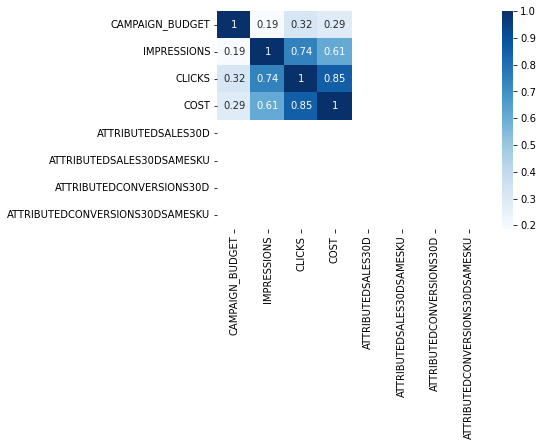

In [45]:
import seaborn as sb
corr = keywords_report_df5.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,CAMPAIGN_BUDGET,IMPRESSIONS,CLICKS,COST,ATTRIBUTEDSALES30D,ATTRIBUTEDSALES30DSAMESKU,ATTRIBUTEDCONVERSIONS30D,ATTRIBUTEDCONVERSIONS30DSAMESKU
CAMPAIGN_BUDGET,1.00,0.19,0.32,0.29,nan,nan,nan,nan
IMPRESSIONS,0.19,1.00,0.74,0.61,nan,nan,nan,nan
CLICKS,0.32,0.74,1.00,0.85,nan,nan,nan,nan
COST,0.29,0.61,0.85,1.00,nan,nan,nan,nan
ATTRIBUTEDSALES30D,nan,nan,nan,nan,nan,nan,nan,nan
ATTRIBUTEDSALES30DSAMESKU,nan,nan,nan,nan,nan,nan,nan,nan
ATTRIBUTEDCONVERSIONS30D,nan,nan,nan,nan,nan,nan,nan,nan
ATTRIBUTEDCONVERSIONS30DSAMESKU,nan,nan,nan,nan,nan,nan,nan,nan


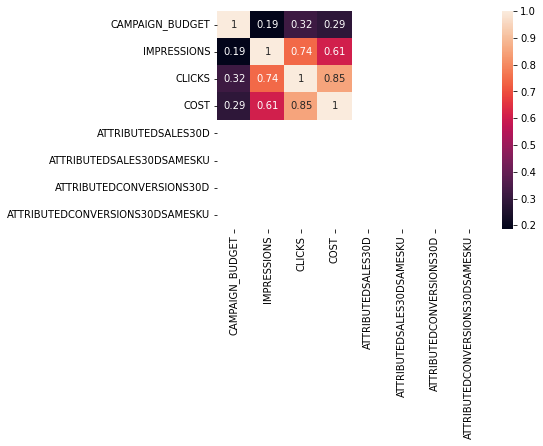

In [47]:
import seaborn as sns
Var_Corr = keywords_report_df5.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
 
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [58]:
# dataframe_query = f'''
#         select * from ams.keywords_report limit 1000;
#         '''
dataframe_query = f'''
        select distinct PAGE_TYPE

        from aramus.search_data_archive 
        limit 2000;
        '''
keywords_report_df = snowflake_db_connector.getResultForQuery(dataframe_query)
keywords_report_df

,PAGE_TYPE
0,END_OF_SEARCH
1,SEARCH_PAGE
2,BLOCKED_PAGE_BY_VALD
3,None
4,HOME_PAGE


_**TABLE 2**_

In [73]:
dataframe_query = f'''
   select 
    NVL(AVG_PRODUCT_RATING,0) as AVG_PRODUCT_RATING,
    NVL(LIST_PRICE,0) as LIST_PRICE,
    NVL(OFFER_PRICE,0) as OFFER_PRICE,
    CUSTOMER_REVIEWS_COUNT,SEARCH_RANK,SKU_SEARCH_RANK
    from aramus.search_data_archive
    where
    SEARH_TYPE='ORGANIC'
    and SKU_SEARCH_RANK is not null
    and SEARCH_RANK is not null
    and SEARCH_RANK between 1 and 50
    limit 2000;
           '''
keywords_report_df6 = snowflake_db_connector.getResultForQuery(dataframe_query)
keywords_report_df6

,AVG_PRODUCT_RATING,LIST_PRICE,OFFER_PRICE,CUSTOMER_REVIEWS_COUNT,SEARCH_RANK,SKU_SEARCH_RANK
0,4.1,0.00,5.00,95.0,1,3
1,4.6,0.00,9.22,245.0,2,4
2,3.8,0.00,6.04,25.0,3,5
3,4.8,0.00,7.98,34.0,4,6
4,4.6,0.00,12.87,52.0,5,7
...,...,...,...,...,...,...
1995,4.1,29.94,26.41,45.0,34,44
1996,4.3,0.00,9.99,2501.0,1,7
1997,4.3,0.00,9.59,2748.0,2,8
1998,4.3,0.00,2.79,478.0,3,9


In [74]:
keywords_report_df6['AVG_PRODUCT_RATING']=keywords_report_df6['AVG_PRODUCT_RATING'].astype(str).astype(float)
keywords_report_df6['LIST_PRICE']=keywords_report_df6['LIST_PRICE'].astype(str).astype(float)
keywords_report_df6['OFFER_PRICE']=keywords_report_df6['OFFER_PRICE'].astype(str).astype(float)
keywords_report_df6['CUSTOMER_REVIEWS_COUNT']=keywords_report_df6['CUSTOMER_REVIEWS_COUNT'].astype(str).astype(float)
keywords_report_df6['SEARCH_RANK']=keywords_report_df6['SEARCH_RANK'].astype(str).astype(float)
keywords_report_df6['SKU_SEARCH_RANK']=keywords_report_df6['SKU_SEARCH_RANK'].astype(str).astype(float)

<AxesSubplot:>

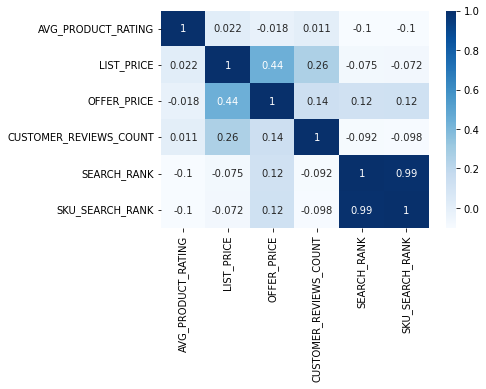

In [75]:
import seaborn as sb
corr = keywords_report_df6.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

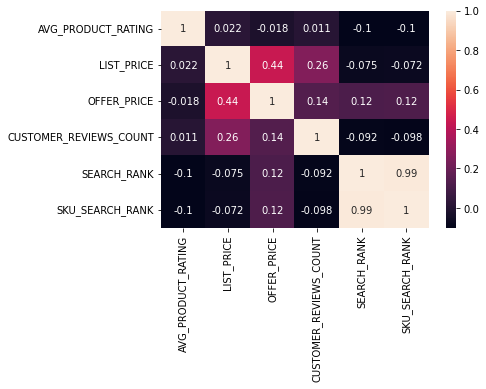

In [76]:
import seaborn as sns
Var_Corr = keywords_report_df6.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
cmap=sns.diverging_palette(5, 500, as_cmap=True)

In [78]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
 
corr = keywords_report_df6.corr()
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,AVG_PRODUCT_RATING,LIST_PRICE,OFFER_PRICE,CUSTOMER_REVIEWS_COUNT,SEARCH_RANK,SKU_SEARCH_RANK
AVG_PRODUCT_RATING,1.00,0.02,-0.02,0.01,-0.10,-0.10
LIST_PRICE,0.02,1.00,0.44,0.26,-0.07,-0.07
OFFER_PRICE,-0.02,0.44,1.00,0.14,0.12,0.12
CUSTOMER_REVIEWS_COUNT,0.01,0.26,0.14,1.00,-0.09,-0.10
SEARCH_RANK,-0.10,-0.07,0.12,-0.09,1.00,0.99
SKU_SEARCH_RANK,-0.10,-0.07,0.12,-0.10,0.99,1.00


**TABLE 7**

In [91]:
dataframe_query = f'''
   select 
     distinct TAGS,max(CLIENTDETAILSID),count(*)
  from aramus.search_data_info
  group by TAGS
    limit 2000;
           '''
keywords_report_df7 = snowflake_db_connector.getResultForQuery(dataframe_query)
keywords_report_df7

,TAGS,MAX(CLIENTDETAILSID),COUNT(*)
0,"[\n ""liquid hand soap""\n]",850,1873
1,"[\n ""body wash""\n]",850,1438
2,"[\n ""UAP""\n]",850,2059
3,"[\n ""toothbrush""\n]",850,2566
4,"[\n ""toothpaste""\n]",850,2913
...,...,...,...
86,"[\n ""KIDS ORAL CARE"",\n ""CHARCOAL PRODUCT"",\...",850,1
87,"[\n ""KIDS ORAL CARE"",\n ""CHARCOAL PRODUCT"",\...",850,1
88,"[\n ""DISH SOAP"",\n ""HAND SOAP""\n]",850,2
89,"[\n ""TOOTHBRUSH (KIDS)"",\n ""KIDS ELECTRIC TO...",850,2


**TABLE 8**

In [96]:
# dataframe_query = f'''
#         select * from ams.keywords_report limit 1000;
#         '''
dataframe_query = f'''
        select 
        distinct BRAND
        from ams_recommendations.keyword_classification
        limit 2000;
        '''
keywords_report_df4 = snowflake_db_connector.getResultForQuery(dataframe_query)
keywords_report_df4

,BRAND
0,classified by dv team
1,classified by ds code
2,KEYWORD_CLASSFICATION_FOR_SOV
3,Manual_Classification_Data_Validation_Team


In [91]:
dataframe_query = f'''
        select 
        CAMPAIGN_BUDGET,
        case PLACEMENT
        when 'Top of Search on-Amazon' then 1
        when 'Other on-Amazon' then 0.5
        when 'Detail Page on-Amazon' then 0.75 end as PLACEMENT,
        CLICKS,IMPRESSIONS,COST,ATTRIBUTEDCONVERSIONS30D,ATTRIBUTEDCONVERSIONS30DSAMESKU,
        ATTRIBUTEDUNITSORDERED30D,ATTRIBUTEDSALES30D,ATTRIBUTEDSALES30DSAMESKU
        from ams.campaigns_report 
        order by CLicks desc
        limit 2000;
        '''
keywords_report_df4 = snowflake_db_connector.getResultForQuery(dataframe_query)
keywords_report_df4



,CAMPAIGN_BUDGET,PLACEMENT,CLICKS,IMPRESSIONS,COST,ATTRIBUTEDCONVERSIONS30D,ATTRIBUTEDCONVERSIONS30DSAMESKU,ATTRIBUTEDUNITSORDERED30D,ATTRIBUTEDSALES30D,ATTRIBUTEDSALES30DSAMESKU
0,18000.00,1.00,4621,205831,14351.31,1342.00,1129.00,1545.00,17334.60,15915.91
1,18000.00,1.00,4245,262448,13237.73,1372.00,1102.00,1597.00,15219.19,13464.00
2,4000.00,1.00,4076,101502,68335.62,688.00,635.00,716.00,31656.42,30765.49
3,18000.00,1.00,3917,255097,12322.92,1099.00,838.00,1278.00,12404.40,10720.70
4,18000.00,1.00,3869,180805,12171.06,1295.00,1063.00,1580.00,15281.05,13730.65
...,...,...,...,...,...,...,...,...,...,...
1995,2200.00,1.00,300,5566,1849.52,143.00,131.00,145.00,1470.52,1309.48
1996,2200.00,1.00,300,5776,1844.34,142.00,136.00,149.00,1461.95,1395.17
1997,332.64,1.00,300,3506,128.46,201.00,195.00,221.00,2218.77,2149.93
1998,140.00,1.00,300,3606,317.71,169.00,158.00,180.00,2002.56,1832.03


In [92]:
keywords_report_df4['CAMPAIGN_BUDGET']=keywords_report_df4['CAMPAIGN_BUDGET'].astype(str).astype(float)
keywords_report_df4['PLACEMENT']=keywords_report_df4['PLACEMENT'].astype(str).astype(float)
keywords_report_df4['CLICKS']=keywords_report_df4['CLICKS'].astype(str).astype(float)
keywords_report_df4['IMPRESSIONS']=keywords_report_df4['IMPRESSIONS'].astype(str).astype(float)
keywords_report_df4['COST']=keywords_report_df4['COST'].astype(str).astype(float)
keywords_report_df4['ATTRIBUTEDCONVERSIONS30D']=keywords_report_df4['ATTRIBUTEDCONVERSIONS30D'].astype(str).astype(float)
keywords_report_df4['ATTRIBUTEDCONVERSIONS30DSAMESKU']=keywords_report_df4['ATTRIBUTEDCONVERSIONS30DSAMESKU'].astype(str).astype(float)
keywords_report_df4['ATTRIBUTEDUNITSORDERED30D']=keywords_report_df4['ATTRIBUTEDUNITSORDERED30D'].astype(str).astype(float)
keywords_report_df4['ATTRIBUTEDSALES30D']=keywords_report_df4['ATTRIBUTEDSALES30D'].astype(str).astype(float)
keywords_report_df4['ATTRIBUTEDSALES30DSAMESKU']=keywords_report_df4['ATTRIBUTEDSALES30DSAMESKU'].astype(str).astype(float)


,CAMPAIGN_BUDGET,PLACEMENT,CLICKS,IMPRESSIONS,COST,ATTRIBUTEDCONVERSIONS30D,ATTRIBUTEDCONVERSIONS30DSAMESKU,ATTRIBUTEDUNITSORDERED30D,ATTRIBUTEDSALES30D,ATTRIBUTEDSALES30DSAMESKU
CAMPAIGN_BUDGET,1.00,-0.26,0.44,0.06,0.45,0.38,0.34,0.38,0.27,0.23
PLACEMENT,-0.26,1.00,0.17,-0.32,0.10,0.28,0.34,0.28,0.32,0.33
CLICKS,0.44,0.17,1.00,0.04,0.80,0.67,0.68,0.66,0.84,0.83
IMPRESSIONS,0.06,-0.32,0.04,1.00,-0.02,-0.14,-0.17,-0.13,-0.12,-0.13
COST,0.45,0.10,0.80,-0.02,1.00,0.49,0.49,0.47,0.73,0.72
ATTRIBUTEDCONVERSIONS30D,0.38,0.28,0.67,-0.14,0.49,1.00,0.99,1.00,0.74,0.68
ATTRIBUTEDCONVERSIONS30DSAMESKU,0.34,0.34,0.68,-0.17,0.49,0.99,1.00,0.98,0.77,0.72
ATTRIBUTEDUNITSORDERED30D,0.38,0.28,0.66,-0.13,0.47,1.00,0.98,1.00,0.73,0.68
ATTRIBUTEDSALES30D,0.27,0.32,0.84,-0.12,0.73,0.74,0.77,0.73,1.00,0.99
ATTRIBUTEDSALES30DSAMESKU,0.23,0.33,0.83,-0.13,0.72,0.68,0.72,0.68,0.99,1.00


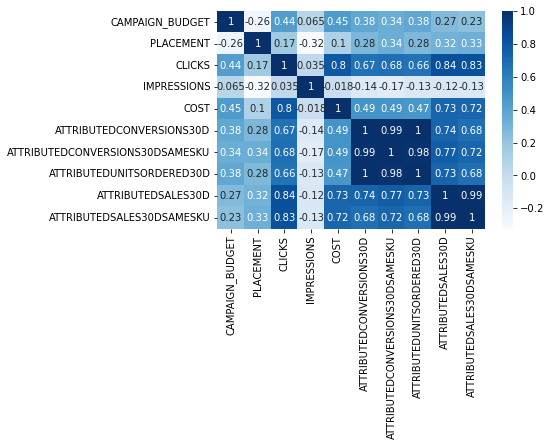

In [100]:
import seaborn as sb
corr = keywords_report_df4.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
 
corr = keywords_report_df4.corr()
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())


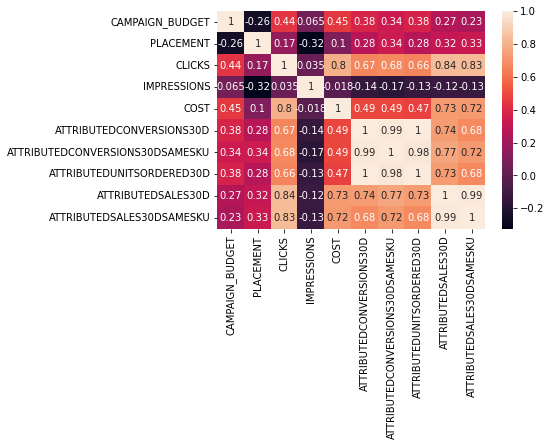

In [99]:
import seaborn as sns
Var_Corr = keywords_report_df4.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
cmap=sns.diverging_palette(5, 500, as_cmap=True)